In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("A1.2 Felicidad y GDP.csv")
df.head()

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


In [ ]:
df.describe()

,Felicidad,GDP
count,141.000000,1.410000e+02
mean,5.560004,5.889942e+11
std,1.098011,2.221612e+12
min,2.403800,1.223876e+09
25%,4.887900,1.805117e+10
50%,5.585300,6.215800e+10
75%,6.309100,3.452960e+11
max,7.821000,2.089370e+13


In [ ]:
y = df["Felicidad"]
X = df["GDP"]

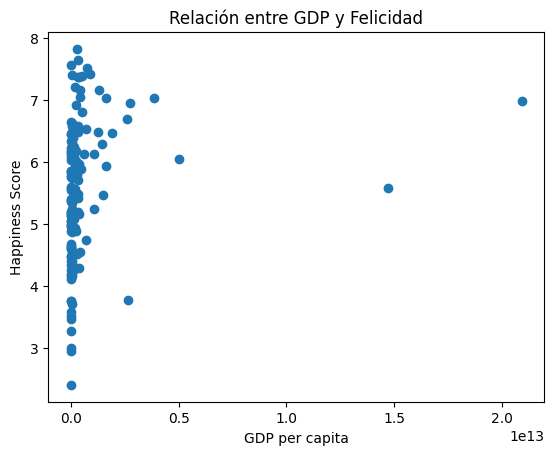

In [ ]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Relación entre GDP y Felicidad")
plt.show()

In [ ]:
X_simple = sm.add_constant(X)
modelo_simple = sm.OLS(y, X_simple).fit()

In [ ]:
modelo_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Felicidad   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.246
Date:                Mon, 26 Jan 2026   Prob (F-statistic):             0.0412
Time:                        04:11:53   Log-Likelihood:                -210.63
No. Observations:                 141   AIC:                             425.3
Df Residuals:                     139   BIC:                             431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5099      0.095     58.247      0.000       5.323       5.697
GDP         8.509e-14   4.13e-14      2.060      0.041    3.44e-15    1.67e-13
==============================================================================
Omnibus:                        1.731   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.798
Skew:                          -0.251   Prob(JB):                        0.407
Kurtosis:                       2.766   Cond. No.                     2.37e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

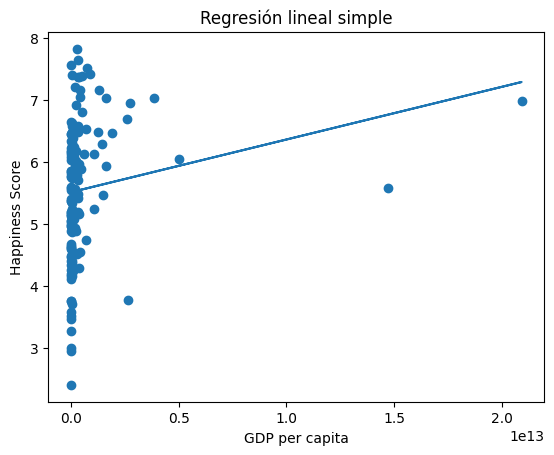

In [ ]:
plt.figure()
plt.scatter(X, y)
plt.plot(X, modelo_simple.predict(X_simple))
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Regresión lineal simple")
plt.show()

Segunda parte

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/happy.csv")
df.head()

,Unnamed: 0,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.41004


In [ ]:
df.describe()

,Unnamed: 0,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,79.000000,5.382185,0.953880,0.793621,0.557619,0.137624
std,45.466105,1.141674,0.412595,0.266706,0.229349,0.111038
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.061260
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.105470
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.175540
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.505210


In [ ]:
df = df.rename(columns={
    "Happiness.Score": "Happiness",
    "Economy..GDP.per.Capita.": "GDP",
    "Family": "Family",
    "Health..Life.Expectancy.": "Health",
    "Trust..Government.Corruption.": "Trust"
})

df.head()

,Unnamed: 0,Country,Happiness,GDP,Family,Health,Trust
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.41004


In [ ]:
(df == 0).sum()

,0
Unnamed: 0,0
Country,0
Happiness,0
GDP,1
Family,1
Health,1
Trust,1


In [ ]:
df_clean = df[(df["GDP"] > 0) & (df["Health"] > 0) & (df["Family"] > 0)]
df_clean.shape

(154, 7)

In [ ]:
df_clean.describe()

,Unnamed: 0,Happiness,GDP,Family,Health,Trust
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,78.318182,5.400162,0.968267,0.802821,0.566126,0.136995
std,45.417267,1.138738,0.402732,0.258414,0.222753,0.111127
min,1.000000,2.905000,0.056610,0.104190,0.038240,0.000000
25%,39.250000,4.406750,0.689063,0.648890,0.403438,0.060878
50%,78.500000,5.351500,1.029095,0.848060,0.610635,0.104725
75%,117.750000,6.310250,1.279707,1.021648,0.730035,0.175297
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.505210


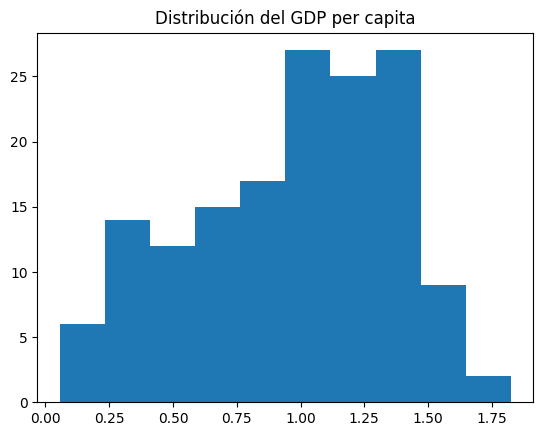

In [ ]:
plt.hist(df_clean["GDP"])
plt.title("Distribución del GDP per capita")
plt.show()

In [ ]:
df_clean["log_GDP"] = np.log(df_clean["GDP"])

/tmp/ipython-input-1036575891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["log_GDP"] = np.log(df_clean["GDP"])


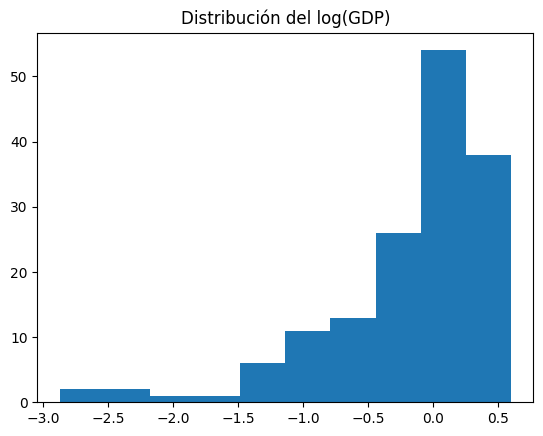

In [ ]:
plt.hist(df_clean["log_GDP"])
plt.title("Distribución del log(GDP)")
plt.show()

In [ ]:
y = df_clean["Happiness"]
X = df_clean[["log_GDP", "Family", "Health", "Trust"]]

In [ ]:
X = sm.add_constant(X)
modelo_multiple = sm.OLS(y, X).fit()
modelo_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.45e-46
Time:                        04:24:23   Log-Likelihood:                -124.73
No. Observations:                 154   AIC:                             259.5
Df Residuals:                     149   BIC:                             274.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6969      0.238     11.315      0.000       2.226       3.168
log_GDP        0.2706      0.113      2.388      0.018       0.047       0.494
Family         1.6770      0.223      7.522      0.000       1.236       2.118
Health         2.0397      0.318      6.415      0.000       1.411       2.668
Trust          1.8167      0.421      4.319      0.000       0.986       2.648
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                2.349
Skew:                          -0.301   Prob(JB):                        0.309
Kurtosis:                       3.056   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
r2_multiple = modelo_multiple.rsquared
r2_multiple

np.float64(0.7703905588928106)

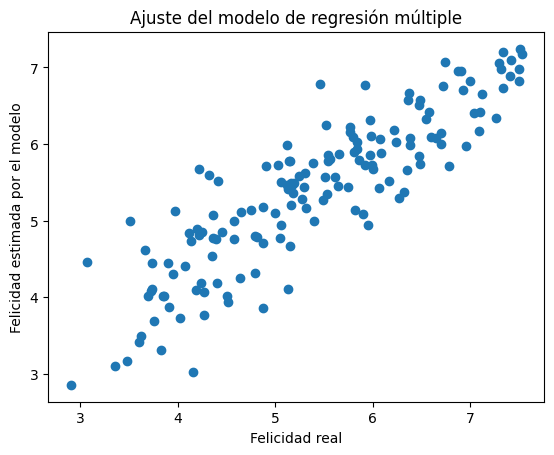

In [ ]:
y_est = modelo_multiple.fittedvalues

plt.figure()
plt.scatter(y, y_est)
plt.xlabel("Felicidad real")
plt.ylabel("Felicidad estimada por el modelo")
plt.title("Ajuste del modelo de regresión múltiple")
plt.show()
